In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Concatenate , Add, Dot, Activation
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

Num GPUs Available:  1
2.9.1


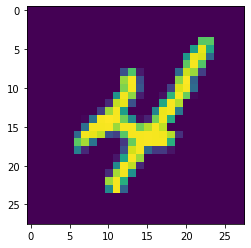

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

AssertionErrorx_train = np.expand_dims(x_train, -1)
x = x_train[9].reshape(1, 28,28,1)
plt.imshow(x[0])

In [4]:
from sa_decomp_layer import SADecompLayer

# Test SADecpmp module
print(x.shape)

'''model = keras.Sequential([
    
    keras.Input(shape=input_shape),
    SADecompLayer(w_size=4, name='sad1_1'),
    #SADecompLayer(w_size=28, name='sad2_1'),

    ])
#model.summary()
# Call model on a test input
#model = keras.Model(input, ys, name="encoder")
#model.summary()

sym = model(x)
print(sym.shape)
#asym = x - sym
plt.imshow( sym[0,:,:,0]  )'''






(1, 28, 28, 1)


'model = keras.Sequential([\n    \n    keras.Input(shape=input_shape),\n    SADecompLayer(w_size=4, name=\'sad1_1\'),\n    #SADecompLayer(w_size=28, name=\'sad2_1\'),\n\n    ])\n#model.summary()\n# Call model on a test input\n#model = keras.Model(input, ys, name="encoder")\n#model.summary()\n\nsym = model(x)\nprint(sym.shape)\n#asym = x - sym\nplt.imshow( sym[0,:,:,0]  )'

BEFORE:



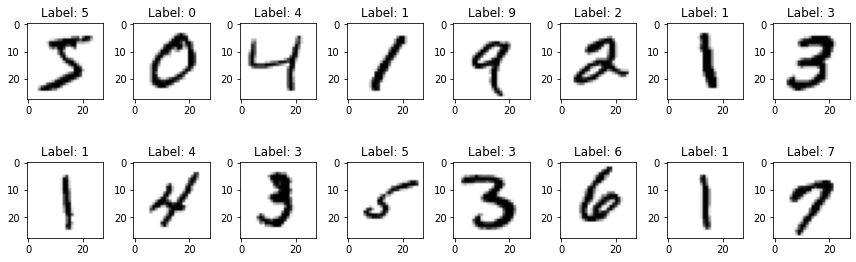

AFTER:



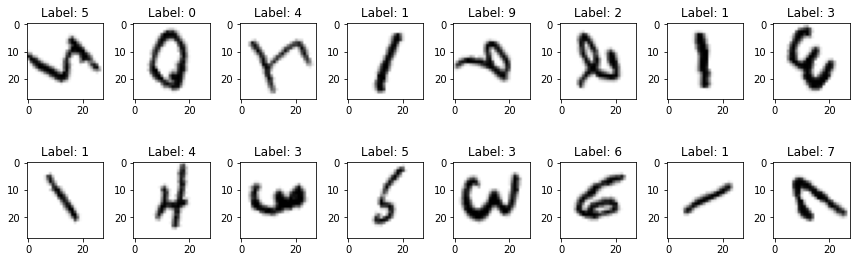

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# specify the maximum rotation_range angle
rotation_range_val = 180
# import relevant library
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num = num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


In [6]:
def rotateDataset(x,y, maxRot = 360, h=28, w=28, batch_size=100):
    datagen = ImageDataGenerator(rotation_range=maxRot)
    # fit the generator
    datagen.fit(x.reshape(x.shape[0], 28, 28, 1))
    #out = datagen.flow(x.reshape(x.shape[0], h, w, 1), y.reshape(y.shape[0], -1), batch_size=batch_size)

    out = datagen.flow(x.reshape(x.shape[0], h, w, 1), x.reshape(x.shape[0], h, w, 1), batch_size=batch_size)


    return  out


In [7]:


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
input_shape

(28, 28, 1)

In [26]:
from sa_decomp_layer import SADecompLayer

input_net = Input(input_shape)
s, a = SADecompLayer( w_size = 3)(input_net)
y = (Concatenate()([s, a]))
#y = layers.Conv2D(32, kernel_size=(3, 3), strides = (2,2),  padding='SAME', activation=None)(input_net)
#y = layers.Conv2D(64, kernel_size=(3, 3), strides = (2,2), padding='SAME', activation=None)(s)

'''s, a = SADecompLayer( w_size = 28)(input_net)
y = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(Concatenate()([s, a]))
pool = layers.MaxPooling2D(pool_size=(2, 2))(y) 

s, a = SADecompLayer( w_size = 14)(pool)
y = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(Concatenate()([s, a]))
pool = layers.MaxPooling2D(pool_size=(2, 2))(y) 

s, a = SADecompLayer( w_size = 7)(pool)
y = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(Concatenate()([s, a]))

s, a = SADecompLayer( w_size = 7)(pool)
bottle_neck = Concatenate()([s, a])'''

'''
y = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(input_net)

pool = layers.MaxPooling2D(pool_size=(2, 2))(y) 
y = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(pool)
pool = layers.MaxPooling2D(pool_size=(2, 2))(y) 
y = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(pool)

bottle_neck = y'''

#y = layers.Conv2DTranspose(64, kernel_size=(3, 3), strides = 2, padding='SAME', activation='relu')(bottle_neck)
'''y = layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=2, padding='SAME', activation='relu')(bottle_neck)
y = layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding='SAME', activation='relu')(y)'''



'''y = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(anti1_1)
y = Add()([y, sym1_1])
y = layers.Conv2D(32, kernel_size=(3, 3), strides=(2,2), padding='SAME', activation='relu')(y)
sym1_2, anti1_2 = SADecompLayer( w_size=7, name='sad1_2')(y)

y = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(anti1_2)
y = Add()([y, sym1_2])
y = layers.Conv2D(32, kernel_size=(3, 3), strides=(2,2), padding='SAME', activation='relu')(y)'''


#pool2_1 = layers.MaxPooling2D(pool_size=(28,28))(bn) 
'''conv1_2 = layers.Conv2D(32, kernel_size=(7, 7), padding='SAME', activation='relu')(conv1_1)
#sym2_1, anti2_1 = SADecompLayer( w_size=3, name='sad2_1')(input_net)

#y = Concatenate()([conv1_2, anti1_1])
sym1_2, anti1_2 = SADecompLayer( w_size=7, name='sad1_2')(conv1_2)
conv1_3 = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(sym1_2)
conv1_4 = layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu')(conv1_3)
pool1_1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1_4) 


sym2_1, anti2_1 = SADecompLayer( w_size=3, name='sad2_1')(pool1_1)
conv2_1 = layers.Conv2D(128, kernel_size=(7, 7), padding='SAME', activation='relu')(sym2_1)
conv2_2 = layers.Conv2D(128, kernel_size=(7, 7), padding='SAME', activation='relu')(conv2_1)
#sym2_1, anti2_1 = SADecompLayer( w_size=3, name='sad2_1')(input_net)

#y = Concatenate()([conv1_2, sym2_1])

sym2_2, anti2_2 = SADecompLayer( w_size=7, name='sad3_1')(conv2_2)
conv2_3 = layers.Conv2D(128, kernel_size=(3, 3), padding='SAME', activation='relu')(sym2_2)
conv2_4 = layers.Conv2D(128, kernel_size=(3, 3), padding='SAME', activation='relu')(conv2_3)
#y = Concatenate()([conv2_4, anti2_1])'''




'''conv2_1 = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(anti1_2)
conv2_1 = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(anti1_2)

sym1_2, anti1_2 = SADecompLayer( w_size=3, name='sad1_2')(conv2_1)
y = Add()([anti1_2, conv2_1])

pool1_1 = layers.MaxPooling2D(pool_size=(2, 2))(y) 

sym2_1, anti2_1 = SADecompLayer( w_size=7, name='sad2_1')(pool1_1)
conv2_1 = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(anti2_1)
y = Add()([anti2_1, anti2_2])

conv2_2 = layers.Conv2D(32, kernel_size=(3, 3), padding='SAME', activation='relu')(conv2_1)
sym2_2, anti2_2 = SADecompLayer( w_size=7, name='sad2_2')(conv2_2)
y = Add()([sym2_1, anti2_2])'''

#pool2_1 = layers.MaxPooling2D(pool_size=(2, 2))(conv2_4) 

#cnn_out = layers.Flatten()(y)
#dense = layers.Dense(1024, activation="relu")(cnn_out)


#cnn_out_s = layers.Flatten()(s)
#cnn_out_a = layers.Flatten()(a)

'''dense_s = layers.Dense(num_classes, activation="relu")(cnn_out_s)
dense_a = layers.Dense(num_classes, activation="relu")(cnn_out_a)'''

#output_net  = [s,a] # layers.Dense(num_classes, activation="softmax"))
#output_net  = layers.Dense(num_classes, activation="softmax")(dense)


#cnn_out = layers.Dropout(0.5)(cnn_out)
#layers.Dense(1200, activation='relu'),
#layers.Dense(3200, activation='relu'),

#output_net  = layers.Dense(num_classes, activation="softmax")(cnn_out)


model = Model(inputs = input_net, outputs = y)
model.summary()


Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sa_decomp_layer_4 (SADecompLay  ((None, 28, 28, 1),  0          ['input_6[0][0]']                
 er)                             (None, 28, 28, 1))                                               
                                                                                                  
 concatenate (Concatenate)      (None, 28, 28, 2)    0           ['sa_decomp_layer_4[0][0]',      
                                                                  'sa_decomp_layer_4[0][1]']      
                                                                                           

In [24]:
batch_size = 128
epochs = 5
model.compile(loss=tf.keras.losses.kl_divergence, optimizer="adam", metrics=["accuracy"])

#model.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(rotateDataset(x_test,x_test)))

In [11]:
#rotateDataset(x_test,y_test)
score = model.evaluate(rotateDataset(x_test,y_test, maxRot=360), verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


100/100 [==============================] - 3s 33ms/step - loss: -0.0279 - accuracy: 0.0756
Test loss: -0.027919309213757515
Test accuracy: 0.07556122541427612


In [12]:
def get_cnn_out(input, layer_num):
    get_layer_output = K.function([model.input], [l.output for l in model.layers][layer_num])
    layer_out = np.array(get_layer_output(input))
    return layer_out[0]

1/1 [==============================] - 0s 264ms/step
604 858
(1, 28, 28, 2)
(1, 28, 28, 2)


IndexError: index 1 is out of bounds for axis 0 with size 1

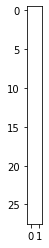

<Figure size 432x288 with 0 Axes>

In [27]:
get_layer_output = K.function([model.input], model.layers[-1].output)

for X,Y in rotateDataset(x_test,y_test, batch_size=1, maxRot=360):
    print(np.argmax(Y), np.argmax(model.predict(X)))
    #plt.imshow(X.reshape(28,28), cmap='gray_r')  
    plt.figure(1)  

    get_layer_output = K.function([model.input], model.layers[-1].output)
    layer_out = np.array(get_layer_output([X]))
    print(layer_out.shape)
    plt.imshow(layer_out[0, :, :, 0],  cmap='gray_r')   

    plt.figure(2) 

    print(layer_out.shape)
    plt.imshow(layer_out[0, :, : ,1 ],  cmap='gray_r')

    break

In [14]:
np.sum(layer_out[0][0])

0.0